# Deep Learning
## Actividad 1: Deep Vision

Juan Francisco Casazola Salvatierra

Ignacio Casado

# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

In [1]:
from keras.datasets import cifar100
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2, InceptionResNetV2, Xception
import tensorflow.keras.backend as K
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import random

# Semillas
random.seed(42)  # Python random
np.random.seed(42)  # NumPy random
tf.random.set_seed(42)  # TensorFlow random

# Carga de datos
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()

# CIFAR100 labelnames
labelNames = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

2025-04-26 14:45:20.111753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745678720.134087     386 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745678720.140771     386 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[INFO]: Loading CIFAR-100 data...


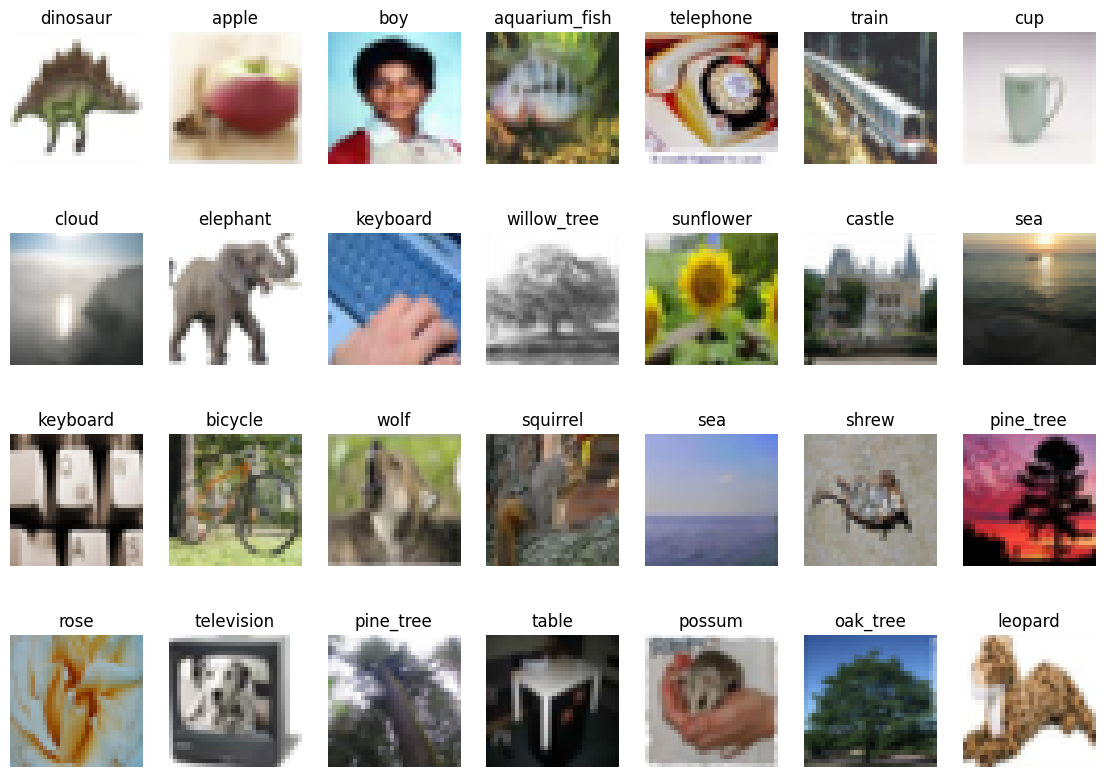

In [2]:
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_train[n]
    plt.imshow(img)
    plt.title(labelNames[y_train[n][0]])
    plt.axis('off')

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

y_train = y_train.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Experimentos con estrategia 1: Red pre-entrenada

## Experimento 1 (MobileNetV2)

I0000 00:00:1745678726.796542     386 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/40


I0000 00:00:1745678756.907472     440 cuda_dnn.cc:529] Loaded cuDNN version 90300


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.1857 - loss: 3.9131 - val_accuracy: 0.4484 - val_loss: 2.1725 - learning_rate: 0.0010
Epoch 2/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3225 - loss: 2.9014 - val_accuracy: 0.4602 - val_loss: 2.1416 - learning_rate: 0.0010
Epoch 3/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3419 - loss: 2.8354 - val_accuracy: 0.4720 - val_loss: 2.1158 - learning_rate: 0.0010
Epoch 4/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3454 - loss: 2.8258 - val_accuracy: 0.4835 - val_loss: 2.0926 - learning_rate: 0.0010
Epoch 5/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3489 - loss: 2.8167 - val_accuracy: 0.4862 - val_loss: 2.1126 - learning_rate: 0.0010
Epoch 6/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3529 - loss: 2.8299 - val_accuracy: 0.4842 - val_loss: 2.1208 - learning_rate: 0.0010
Epoch 7/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3495 

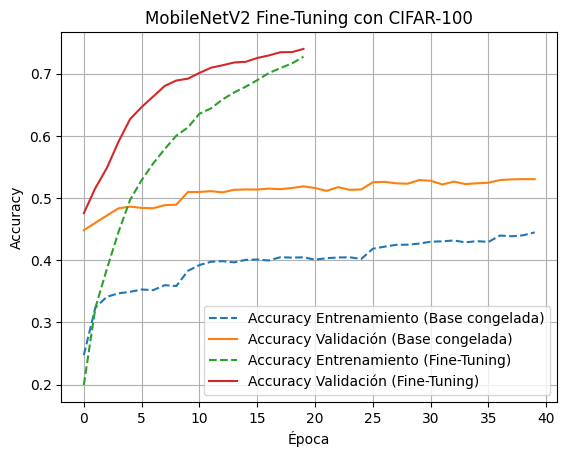

In [4]:
# Tamaño del resize
IMG_SIZE = 96
# Redimensionamos las imágenes de CIFAR-100 a 96x96 para adaptarlas al tamaño que espera MobileNetV2
x_train_ft = tf.image.resize(x_train, [IMG_SIZE, IMG_SIZE]).numpy()
x_test_ft = tf.image.resize(x_test, [IMG_SIZE, IMG_SIZE]).numpy()
x_val_ft = tf.image.resize(x_val, [IMG_SIZE, IMG_SIZE]).numpy()

# Usamos MobileNetV2 preentrenado en ImageNet, sin la parte de clasificación final (include_top=False)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Congelamos el modelo base (sus pesos no se actualizarán inicialmente)
base_model.trainable = False

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Aumentamos los datos aplicando flip horizontal, rotación y zoom aleatorio
x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)

# Pasamos la imagen aumentada por el modelo base
x = base_model(x, training=False)

# Aplicamos un GlobalAveragePooling2D para reducir las dimensiones de salida del feature map
x = layers.GlobalAveragePooling2D()(x)

# Aplicamos un Dropout para reducir overfitting
x = layers.Dropout(0.5)(x)

# Capa densa final con 100 clases (CIFAR-100) y activación softmax
outputs = layers.Dense(100, activation="softmax")(x)

# Definimos el modelo completo
model = models.Model(inputs, outputs)

# Compilamos el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Usamos Adam con un learning rate inicial normal
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),     # Como las etiquetas son enteros, usamos SparseCategoricalCrossentropy
    metrics=["accuracy"]  # Métrica principal: exactitud
)

# Definimos Callbacks
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True) # detiene el entrenamiento si no mejora en 10 épocas, restaurando el mejor modelo

model_checkpoint = ModelCheckpoint("mobilenetv2.keras", monitor="val_accuracy", save_best_only=True) # guardamos automáticamente el mejor modelo basado en la val_accuracy

lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1, min_lr=1e-6) # reducimos el learning rate si la val_loss no mejora, para que el modelo ajuste mejor

# Primer entrenamiento
history = model.fit(
    x_train_ft, y_train,
    validation_data=(x_val_ft, y_val),
    epochs=40,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint, lr_scheduler]
)

# Descongelamos el modelo base para Fine-Tuning
base_model.trainable = True

# Compilamos nuevamente con un learning rate MUY bajo para no destruir los pesos preentrenados
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Fine-tuning del modelo
fine_tune_history = model.fit(
    x_train_ft, y_train,
    validation_data=(x_val_ft, y_val),
    epochs=20,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint, lr_scheduler]
)

print("Modelo final")
results = model.evaluate(x_test_ft, y_test, batch_size=16, verbose=1)

# Gráfica detallada de entrenamiento (base y fine-tuned)
plt.plot(history.history["accuracy"], label="Accuracy Entrenamiento (Base congelada)", linestyle="--")
plt.plot(history.history["val_accuracy"], label="Accuracy Validación (Base congelada)")
plt.plot(fine_tune_history.history["accuracy"], label="Accuracy Entrenamiento (Fine-Tuning)", linestyle="--")
plt.plot(fine_tune_history.history["val_accuracy"], label="Accuracy Validación (Fine-Tuning)")
plt.title("MobileNetV2 Fine-Tuning con CIFAR-100")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


En esta gráfica de MobileNetV2 con CIFAR-100, se ve que al principio, con la base congelada, el modelo mejora pero muy lentamente y tiene bastante overfitting, llegando a un accuracy que ronda el 50% aunque sin mucho crecimiento. Luego, cuando se hace el fine-tuning, el cambio es muy notorio: el modelo empieza a aprender mucho mejor y tanto en entrenamiento como en validación alcanza resultados bastante altos y estables (llegando y/o superando el 70%), sin señales fuertes de overfitting. En general, el proceso fue muy bien llevado y el fine-tuning hizo una gran diferencia.

In [5]:
del base_model, inputs, x, outputs, model, history, fine_tune_history, results

## Experimento 2 (InceptionResNetV2)

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 148s 48ms/step - accuracy: 0.2075 - loss: 4.3034 - val_accuracy: 0.4142 - val_loss: 2.7260 - learning_rate: 0.0010
Epoch 2/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 43ms/step - accuracy: 0.3237 - loss: 3.5203 - val_accuracy: 0.4327 - val_loss: 2.7164 - learning_rate: 0.0010
Epoch 3/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 44ms/step - accuracy: 0.3323 - loss: 3.5585 - val_accuracy: 0.4412 - val_loss: 2.7423 - learning_rate: 0.0010
Epoch 4/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.3463 - loss: 3.5422 - val_accuracy: 0.4401 - val_loss: 2.8429 - learning_rate: 0.0010
Epoch 5/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 44ms/step - accuracy: 0.3453 - loss: 3.6361 - val_accuracy: 0.4434 - val_loss: 2.7994 - learning_rate: 0.0010
Epoch 6/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 110s 44ms/step - accuracy: 0.3510 - loss: 3.6375 - val_accuracy: 0.4553 - val_loss: 2.8431 - learning_rate: 0.0010
Epoch

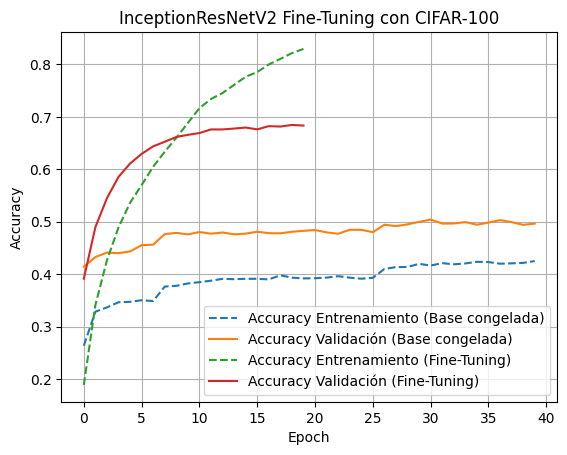

In [6]:
# Cargamos InceptionResNetV2 preentrenado en ImageNet, sin su capa final (clasificación)
base_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Congelamos el modelo base (sus pesos no se actualizarán inicialmente)
base_model.trainable = False

# Definimos la entrada del modelo con el tamaño especificado
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Aumentamos los datos aplicando flip horizontal, rotación y zoom aleatorio
x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)

# Capa densa final con 100 clases (CIFAR-100) y activación softmax
outputs = layers.Dense(100, activation="softmax")(x)

# Definimos el modelo completo
model = models.Model(inputs, outputs)

# Compilamos el modelo con Adam y sparse categorical crossentropy
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# EarlyStopping para evitar overfitting, detiene si val_accuracy no mejora en 10 épocas
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

# Guardamos el mejor modelo durante el entrenamiento
model_checkpoint = ModelCheckpoint("inceptionresnetv2.keras", monitor="val_accuracy", save_best_only=True)

# Disminuimos el learning rate si la val_loss no mejora
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Primer entrenamiento
history = model.fit(
    x_train_ft, y_train,
    validation_data=(x_val_ft, y_val),
    epochs=40,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint, lr_scheduler]
)

# Descongelamos el modelo base para hacer fine-tuning
base_model.trainable = True

# Recompilamos el modelo con un learning rate muy bajo para evitar dañar los pesos preentrenados
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Fine-tuning del modelo
fine_tune_history = model.fit(
    x_train_ft, y_train,
    validation_data=(x_val_ft, y_val),
    epochs=20,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint, lr_scheduler]
)

print("Modelo final")
results = model.evaluate(x_test_ft, y_test, batch_size=16, verbose=1)

# Gráfica detallada de entrenamiento (base y fine-tuned)
plt.plot(history.history["accuracy"], label="Accuracy Entrenamiento (Base congelada)", linestyle="--")
plt.plot(history.history["val_accuracy"], label="Accuracy Validación (Base congelada)")
plt.plot(fine_tune_history.history["accuracy"], label="Accuracy Entrenamiento (Fine-Tuning)", linestyle="--")
plt.plot(fine_tune_history.history["val_accuracy"], label="Accuracy Validación (Fine-Tuning)")
plt.title("InceptionResNetV2 Fine-Tuning con CIFAR-100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Podemos ver que en el modelo base (base congelada) el accuracy y su validación van de manera paralela con bastnate overfitting, mientras que en cuando le hacemos fine-tuning en su inicio la validación supera al entrenamiento, pero por el epoch 7-8 empieza a aumentar el overfitting, siendo que la validación no llega al 70% mientras que el entrenamiento lo supera

In [7]:
del base_model, inputs, x, outputs, model, history, fine_tune_history, results

## Experimento 3 (Xception)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 59s 21ms/step - accuracy: 0.2459 - loss: 3.3671 - val_accuracy: 0.4254 - val_loss: 2.3316 - learning_rate: 0.0010
Epoch 2/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.3720 - loss: 2.6767 - val_accuracy: 0.4538 - val_loss: 2.2366 - learning_rate: 0.0010
Epoch 3/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.3880 - loss: 2.6093 - val_accuracy: 0.4571 - val_loss: 2.2112 - learning_rate: 0.0010
Epoch 4/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.3936 - loss: 2.5953 - val_accuracy: 0.4689 - val_loss: 2.2147 - learning_rate: 0.0010
Epoch 5/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.4002 - loss: 2.5805 - val_accuracy: 0.4712 - val_loss: 2.2144 - learning_rate: 0.0010
Epoch 6/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 20ms/step - accuracy: 0.4022 - loss: 2.5697 - val_accuracy: 0.4718 - val_loss: 2.2169 - learning_rate: 0.0010
Epoch 7/40
25

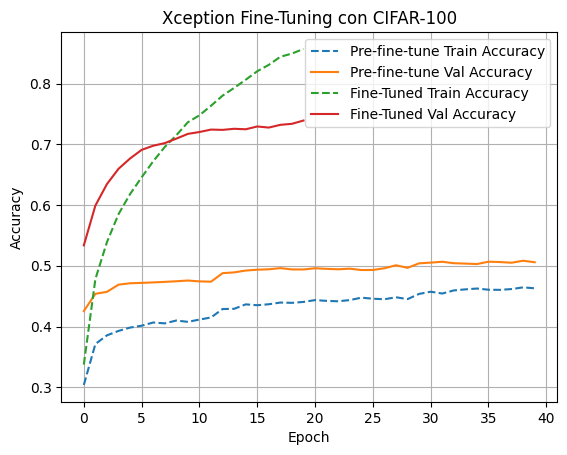

In [8]:
# Cargamos Xception preentrenado en ImageNet, sin su capa final (clasificación)
base_model = Xception(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Congelamos el modelo base (sus pesos no se actualizarán inicialmente)
base_model.trainable = False

# Definimos la entrada del modelo con el tamaño especificado
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Aumentamos los datos aplicando flip horizontal, rotación y zoom aleatorio
x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomRotation(0.1)(x)
x = layers.RandomZoom(0.1)(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)

# Capa densa final con 100 clases (CIFAR-100) y activación softmax
outputs = layers.Dense(100, activation="softmax")(x)

# Definimos el modelo completo
model = models.Model(inputs, outputs)

# Compilamos el modelo con Adam y sparse categorical crossentropy
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# EarlyStopping para evitar overfitting, detiene si val_accuracy no mejora en 10 épocas
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

# Guardamos el mejor modelo durante el entrenamiento
model_checkpoint = ModelCheckpoint("xception.keras", monitor="val_accuracy", save_best_only=True)

# Disminuimos el learning rate si la val_loss no mejora
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Primer entrenamiento
history = model.fit(
    x_train_ft, y_train,
    validation_data=(x_val_ft, y_val),
    epochs=40,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint, lr_scheduler]
)

# Descongelamos el modelo base para hacer fine-tuning
base_model.trainable = True

# Recompilamos el modelo con un learning rate muy bajo para evitar dañar los pesos preentrenados
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Fine-tuning del modelo
fine_tune_history = model.fit(
    x_train_ft, y_train,
    validation_data=(x_val_ft, y_val),
    epochs=20,
    batch_size=16,
    callbacks=[early_stop, model_checkpoint, lr_scheduler]
)

print("Modelo final")
results = model.evaluate(x_test_ft, y_test, batch_size=16, verbose=1)

# Gráfica detallada de entrenamiento (base y fine-tuned)
plt.plot(history.history["accuracy"], label="Pre-fine-tune Train Accuracy", linestyle="--")
plt.plot(history.history["val_accuracy"], label="Pre-fine-tune Val Accuracy")
plt.plot(fine_tune_history.history["accuracy"], label="Fine-Tuned Train Accuracy", linestyle="--")
plt.plot(fine_tune_history.history["val_accuracy"], label="Fine-Tuned Val Accuracy")
plt.title("Xception Fine-Tuning con CIFAR-100")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

En este modelo en el modelo base (pre-fine-tune) pues podemos ver que ocurre lo mismo que en el experimento 2, tenemos el entrenamiento y la validacion evolucionando de forma paralela, y en el fine-tuned vemos que en este modelo a partir del epoch 6-7 empieza a aumentar el overfitting, en este caso la validacion supera el 70% mientras que el entrenamiento supera el 80%

In [9]:
del base_model, inputs, x, outputs, model, history, fine_tune_history, results

## Comparación

In [26]:
import pandas as pd

IMG_SIZE = 96
x_test_ft = tf.image.resize(x_test, [IMG_SIZE, IMG_SIZE]).numpy()

model_files = ["inceptionresnetv2.keras", "mobilenetv2.keras", "xception.keras"]
results = []

for model_file in model_files:
    model = tf.keras.models.load_model(model_file)
    loss, accuracy = model.evaluate(x_test_ft, y_test, verbose=0)
    results.append({'Model': model_file, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

results_df

,Model,Accuracy
1,mobilenetv2.keras,0.7392
2,xception.keras,0.7381
0,inceptionresnetv2.keras,0.6810


# Experimentos con estrategia 2: Entrenar desde cero o from scratch

## Experimento 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1745701550.640624     441 service.cc:148] XLA service 0x7cab40a0eb40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745701550.641595     441 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 64/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0154 - loss: 4.6008

I0000 00:00:1745701551.911080     441 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0615 - loss: 4.2235 - val_accuracy: 0.1934 - val_loss: 3.4144
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2169 - loss: 3.2621 - val_accuracy: 0.2623 - val_loss: 3.0357
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2944 - loss: 2.8574 - val_accuracy: 0.3014 - val_loss: 2.8514
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3457 - loss: 2.6002 - val_accuracy: 0.3235 - val_loss: 2.7550
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3915 - loss: 2.3996 - val_accuracy: 0.3374 - val_loss: 2.7032
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4248 - loss: 2.2365 - val_accuracy: 0.3510 - val_loss: 2.6874
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4542 - loss: 2.0944 - val_accuracy: 0.3514 - val_loss: 2.7279
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4847 - loss: 1.9706 - val_accuracy: 0.3475 - val_

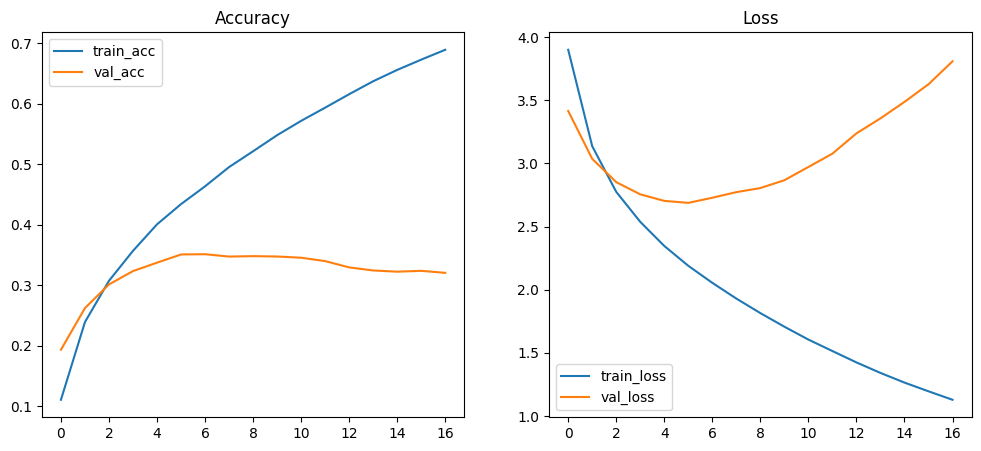

In [10]:
# Definimos el modelo secuencial con dos bloques de convolución + max pooling
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanamos y conectamos con una capa densa intermedia antes de la salida
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))  # 100 clases para CIFAR-100

# Definimos callbacks: EarlyStopping y guardado del mejor modelo
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("exp1.keras", monitor="val_accuracy", save_best_only=True)

# Compilamos el modelo usando Adam y sparse categorical crossentropy para etiquetas como enteros
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Entrenamos el modelo y guardamos el historial
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint]
)

# Graficamos evolución de accuracy y loss en entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()

El entrenamiento empieza con la validación superando el accuracy pero del epoch 1 en adelante se empieza a overfitear el modelo, llegando al punto en que el entrenamiento se interrumpe en el epoch 16.

In [11]:
del model, history

## Experimento 2

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0729 - loss: 4.2305 - val_accuracy: 0.1697 - val_loss: 3.5062
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1882 - loss: 3.3951 - val_accuracy: 0.2618 - val_loss: 3.0192
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2448 - loss: 3.0759 - val_accuracy: 0.3149 - val_loss: 2.7813
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2853 - loss: 2.8822 - val_accuracy: 0.3240 - val_loss: 2.7071
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3120 - loss: 2.7317 - val_accuracy: 0.3494 - val_loss: 2.5945
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3312 - loss: 2.6259 - val_accuracy: 0.3714 - val_loss: 2.4623
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3455 - loss: 2.5592 - val_accuracy: 0.3829 - val_loss: 2.4244
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3614 - loss: 2.4818 - val_accuracy: 0

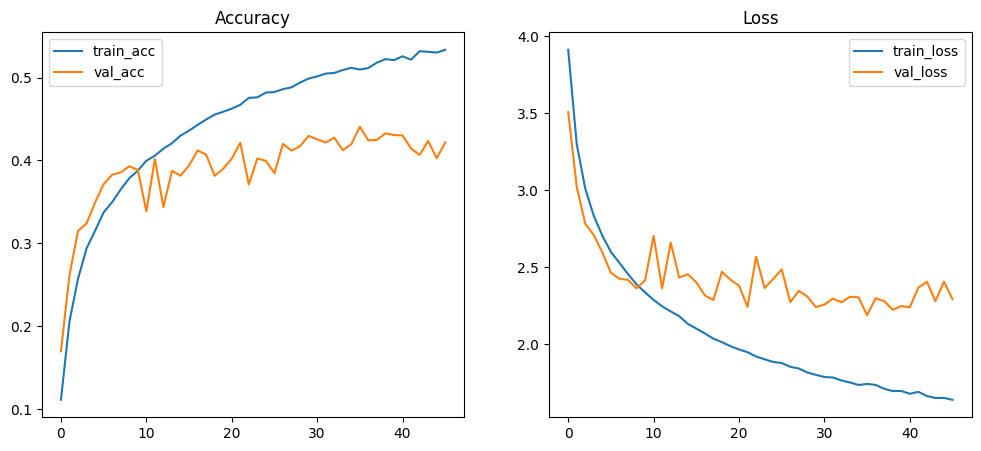

In [12]:
# Definimos un modelo secuencial CNN mejorado con BatchNormalization y Dropout
model = models.Sequential()

# Primer bloque convolucional: Conv2D + BatchNorm + ReLU + MaxPooling + Dropout
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Segundo bloque convolucional: Conv2D + BatchNorm + ReLU + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Aplanado de salidas y conexión a capa densa
model.add(layers.Flatten())

# Capa densa intermedia con normalización y Dropout
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))

# Capa de salida con softmax para 100 clases
model.add(layers.Dense(100, activation='softmax'))

# Definimos callbacks: EarlyStopping y ModelCheckpoint
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("exp2.keras", monitor="val_accuracy", save_best_only=True)

# Compilamos el modelo con Adam y sparse categorical crossentropy
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Entrenamos el modelo y guardamos el historial
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint]
)

# Graficamos Accuracy y Loss para entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()

En este experimento hemos añadido Dropouts y BatchNormalization, y mejora bastante, ya que la validación es superior al accuracy hasta el epoch 7-8, y a partir de este epoch el modelo empieza a overfitearse hasta el punto que el accuracy llega a superar ligeramente el 50% mientras que la validación apenas supera el 40%.

Por lo que podemos ver que con el Dropout mejoró ligeramente el entrenamiento.

In [13]:
del model, history

## Experimento 3

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0753 - loss: 4.2624 - val_accuracy: 0.1729 - val_loss: 3.6093
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1913 - loss: 3.4230 - val_accuracy: 0.1923 - val_loss: 3.4832
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2492 - loss: 3.1268 - val_accuracy: 0.2896 - val_loss: 2.9470
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2859 - loss: 2.9332 - val_accuracy: 0.2907 - val_loss: 2.9671
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3176 - loss: 2.8131 - val_accuracy: 0.3409 - val_loss: 2.7352
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3346 - loss: 2.7488 - val_accuracy: 0.3526 - val_loss: 2.6740
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3456 - loss: 2.6823 - val_accuracy: 0.3442 - val_loss: 2.7551
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3562 - loss: 2.6394 - val_accuracy: 0

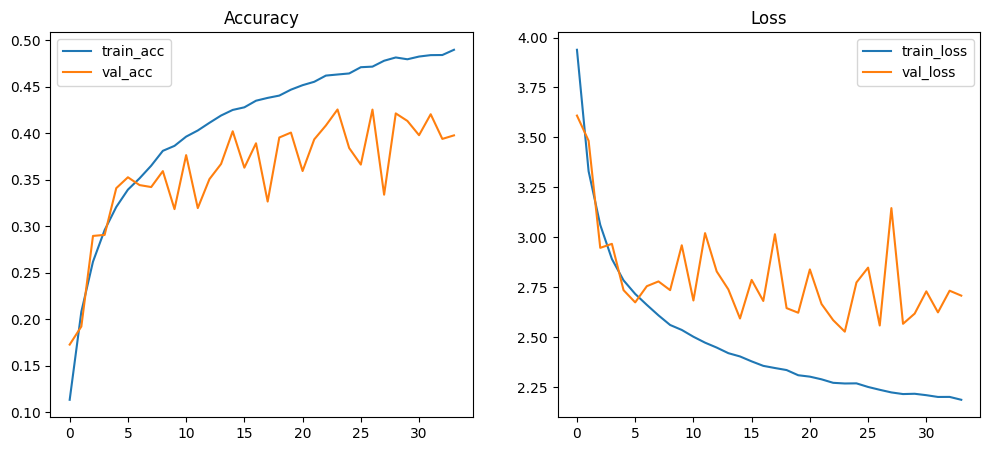

In [14]:
# Definimos el parámetro para aplicar regularización L2 (penalización por pesos grandes)
weight_decay = 1e-4

# Definimos el modelo secuencial CNN con regularización L2, BatchNormalization y Dropout
model = models.Sequential()

# Primer bloque: Conv2D + L2 + BatchNorm + ReLU + MaxPooling + Dropout
model.add(layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

# Segundo bloque: Conv2D + L2 + BatchNorm + ReLU + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# Aplanamos la salida y conectamos a capas densas
model.add(layers.Flatten())

# Capa densa intermedia con L2, BatchNorm, ReLU y Dropout
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))

# Capa de salida para 100 clases (softmax)
model.add(layers.Dense(100, activation='softmax'))

# Definimos callbacks: EarlyStopping y guardado del mejor modelo
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("exp3.keras", monitor="val_accuracy", save_best_only=True)

# Compilamos el modelo usando Adam y sparse categorical crossentropy
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Entrenamos el modelo y guardamos el historial
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint]
)

# Graficamos la evolución de Accuracy y Loss durante entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()

En este modelo añadimos regulaciones L2, el accuracy evoluciona de manera constante mientras que la validación va por picos, subiendo y bajando de manera que su punto más alto de validación es apenas 40% mientras que el entrenamineto se queda cerca de alcanzar el 50%, el entrenamiento para antes ya que el modelo además de overfitearse su validación no mejora en varios epochs

In [15]:
del model, history

## Experimento 4

Epoch 1/100


E0000 00:00:1745701777.124416     386 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_4_1/dropout_9_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.0707 - loss: 4.5153 - val_accuracy: 0.1163 - val_loss: 4.0387
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1707 - loss: 3.5490 - val_accuracy: 0.2390 - val_loss: 3.1490
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2312 - loss: 3.1681 - val_accuracy: 0.2848 - val_loss: 2.8827
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2683 - loss: 2.9653 - val_accuracy: 0.3369 - val_loss: 2.6437
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2930 - loss: 2.8245 - val_accuracy: 0.3482 - val_loss: 2.5418
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3101 - loss: 2.7556 - val_accuracy: 0.3350 - val_loss: 2.8980
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3217 - loss: 2.6679 - val_accuracy: 0.3880 - val_loss: 2.4060
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3432 - loss: 2.5806 - val_

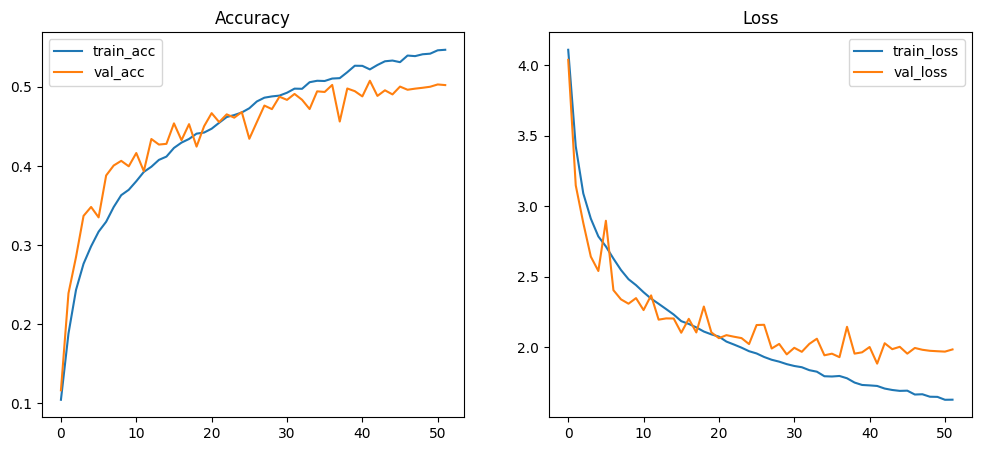

In [16]:
# Definimos la capa de aumento de datos: flip horizontal, rotación y zoom aleatorio
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Definimos un modelo secuencial CNN con data augmentation, BatchNormalization y Dropout
model = models.Sequential()

# Entrada del modelo
model.add(layers.Input(shape=(32, 32, 3)))

# Aplicamos las transformaciones de data augmentation
model.add(data_augmentation)

# Primer bloque: Conv2D + BatchNorm + Dropout
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Segundo bloque: Conv2D (124 filtros) + BatchNorm + MaxPooling + Dropout
model.add(layers.Conv2D(124, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Tercer bloque: Conv2D + BatchNorm + MaxPooling
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Aplanamos la salida y conectamos a capa densa
model.add(layers.Flatten())

# Capa densa intermedia de 512 neuronas + BatchNorm + Dropout
model.add(layers.Dense(512, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Capa de salida: 100 neuronas para las 100 clases de CIFAR-100
model.add(layers.Dense(100, activation="softmax")) 

# Compilamos el modelo con Adam y sparse categorical crossentropy
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Definimos callbacks: EarlyStopping y ModelCheckpoint
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("exp4.keras", monitor="val_accuracy", save_best_only=True)

# Entrenamos el modelo y guardamos el historial
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint]
)

# Graficamos Accuracy y Loss de entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()

En este experimento quitamos la regulación L2, pero hemos añadido data-augmentation, y podemos ver que el entrenamiento mejora mucho más ya que el entrenamiento y la validación van más igualados pero al final el entrenamiento se detiene al pasar el epoch 50 ya que la validación no mejora en varios epochs, sin embargo, el accuracy apenas supera el 50% y la validación no llega al 50%

In [17]:
del model, history

## Experimento 5

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0993 - loss: 4.4395 - val_accuracy: 0.2282 - val_loss: 3.2225
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2762 - loss: 2.9996 - val_accuracy: 0.3419 - val_loss: 2.6138
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3900 - loss: 2.3983 - val_accuracy: 0.3793 - val_loss: 2.4548
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4731 - loss: 1.9896 - val_accuracy: 0.3766 - val_loss: 2.4991
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5504 - loss: 1.6503 - val_accuracy: 0.3454 - val_loss: 2.7530
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6120 - loss: 1.3847 - val_accuracy: 0.3744 - val_loss: 2.5855
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6779 - loss: 1.1228 - val_accuracy: 0.3908 - val_loss: 2.5833
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7240 - loss: 0.9330 - val_acc

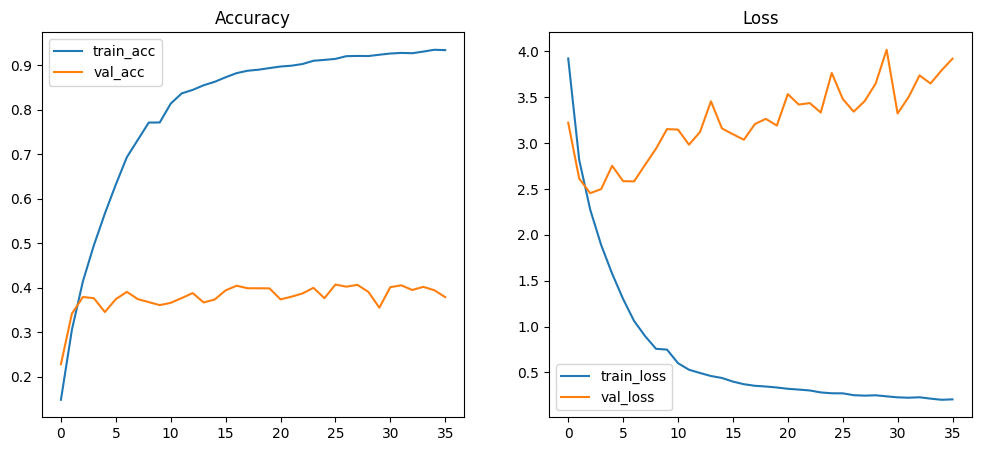

In [ ]:
# Definimos un modelo secuencial
model = models.Sequential()

# Entrada del modelo
model.add(layers.Input(shape=(32, 32, 3)))

# Primer bloque: dos convoluciones 3x3 con BatchNormalization y activación ReLU
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())

# MaxPooling para reducir dimensiones y Dropout para combatir overfitting
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.4))

# Aplanamos las características y conectamos a capa densa
model.add(layers.Flatten())

# Capa densa de 512 neuronas con BatchNorm y Dropout fuerte
model.add(layers.Dense(512, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Capa de salida: 100 clases con activación softmax
model.add(layers.Dense(100, activation="softmax"))

# Compilamos el modelo usando Adam y sparse categorical crossentropy
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Definimos callbacks: EarlyStopping y ModelCheckpoint
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("exp5.keras", monitor="val_accuracy", save_best_only=True)

# Entrenamos el modelo y guardamos el historial
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint]
)

# Graficamos Accuracy y Loss en entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()

En este modelo volvemos al punto inicial, en el que podemos ver que en los primeros epochs (2-3) el modelo empieza a overfitearse y el entrenamiento se detiene en el epoch 35, llegando el accuracy a superar el 90% y la validación rozando el 40%

In [19]:
del model, history

## Experimento 6

Epoch 1/100


E0000 00:00:1745702513.879971     386 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_7_1/dropout_14_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.0630 - loss: 4.7351 - val_accuracy: 0.1545 - val_loss: 3.6556
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.1536 - loss: 3.6819 - val_accuracy: 0.2358 - val_loss: 3.1474
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2181 - loss: 3.2157 - val_accuracy: 0.2979 - val_loss: 2.8118
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2696 - loss: 2.9311 - val_accuracy: 0.3217 - val_loss: 2.7079
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.2987 - loss: 2.7591 - val_accuracy: 0.3939 - val_loss: 2.3036
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3332 - loss: 2.6062 - val_accuracy: 0.3961 - val_loss: 2.3364
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3560 - loss: 2.4848 - val_accuracy: 0.3992 - val_loss: 2.2765
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3780 - loss: 2.3827 - val_

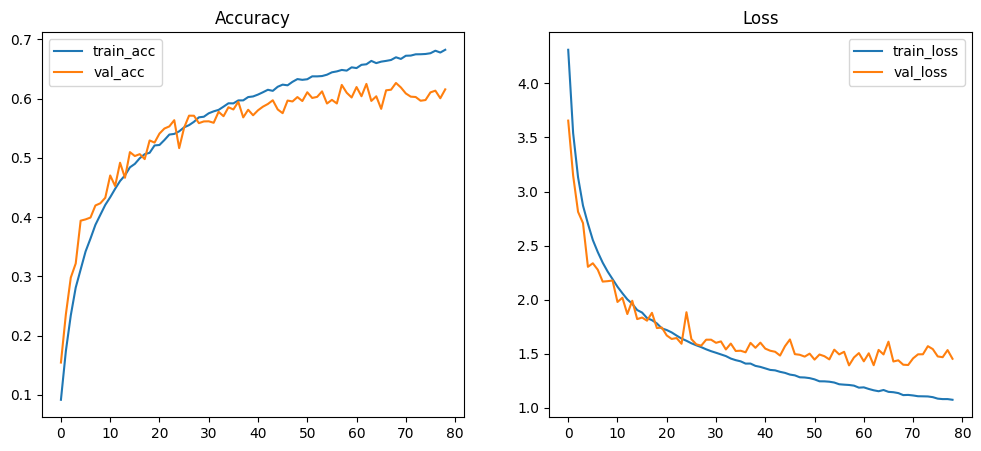

In [ ]:
# Definimos la capa de aumento de datos
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Definimos un modelo secuencial
model = models.Sequential()

# Entrada del modelo
model.add(layers.Input(shape=(32, 32, 3)))

# Aplicamos aumento de datos a la entrada
model.add(data_augmentation)

# Primer bloque convolucional: dos convoluciones 64 filtros + BatchNorm + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Segundo bloque: dos convoluciones 128 filtros + BatchNorm + MaxPooling + Dropout
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.4))

# Tercer bloque: dos convoluciones 256 filtros + BatchNorm + MaxPooling + Dropout
model.add(layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Aplanamos las salidas y conectamos a capas densas
model.add(layers.Flatten())

# Capa densa de 512 neuronas con BatchNorm y Dropout fuerte
model.add(layers.Dense(512, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Capa de salida: 100 clases para CIFAR-100 con softmax
model.add(layers.Dense(100, activation="softmax"))

# Compilamos el modelo usando Adam y sparse categorical crossentropy
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Definimos callbacks: EarlyStopping para detener si no mejora, y guardado del mejor modelo
early_stop = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("exp6.keras", monitor="val_accuracy", save_best_only=True)

# Entrenamos el modelo y guardamos el historial
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint]
)

# Graficamos la evolución del Accuracy y Loss en entrenamiento y validación
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.show()

En este experimento volvemos a añadir el data_augmentation, pero ente experimento tenemos más capas convolucionales y en el bloque 3 las capas convolucionales tienes 256 filtos, podemos ver que el entrenamiento ha mejorado mucho más, viendo que el entrenamiento se interrumpe por el epoch 80, y tiene un ligero overfitting, su accuracy roza el 70% mientras que la validación supera ligeramente el 60%

In [ ]:
del model, history

## Comparación

In [24]:
import pandas as pd

model_files = ["exp1.keras", "exp2.keras", "exp3.keras", "exp4.keras", "exp5.keras", "exp6.keras"]
results = []

for model_file in model_files:
    model = tf.keras.models.load_model(model_file)
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    results.append({'Model': model_file, 'Accuracy': accuracy})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

results_df

,Model,Accuracy
5,exp6.keras,0.6253
3,exp4.keras,0.5151
1,exp2.keras,0.4359
2,exp3.keras,0.4238
4,exp5.keras,0.4044
0,exp1.keras,0.3446


Aquí tenemos la comparación de accuracy de nuestros modelos, se nos hizo interesante que el mejor modelo no fuera el que más pesaba (en MB), ya que los modelos 1, 2 y 3 apenas llegaban a 7 MB y no llegan al 50%, mientras que el modelo 4 pesa 27 MB y llega a ser el segundo mejor modelo, pero el modelo 5 pesa más de 100 MB y es de los peores, y por último, el mejor modelo solo pesa 39 MB